In [1]:
#Now we'll learn about pandas built-in methods of summarizing data founr in DataFrames
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [2]:
#Let's create a dataframe to work with
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns = ['One','Two','Three'])

#Show
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [3]:
#Let's see the sum() method in action, of each column
#Notice how it ignores NaN values
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [4]:
#Notice how it ignores NaN values
#We can also over rows instead of columns
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [7]:
#Can also grab min and max values of dataframe
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [9]:
#As well as all index
#Same deal with max, just replace min for max
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [11]:
#Can also do an accumulation sum
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [12]:
#A very useful feature is describe, which provides summary statistics
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [13]:
# We can also get information on correlation and covariance

#For more info on correlation and covariance, check out the videos below!

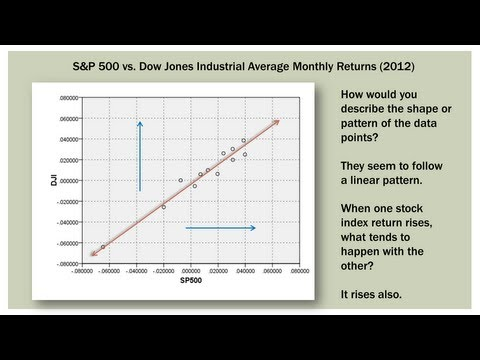

In [14]:
from IPython.display import YouTubeVideo
# For more information about Covariaance and Correlation
# Check out these great videos!
# Video credit: Brandon Foltz.

#CoVariance
YouTubeVideo('xGbpuFNR1ME')

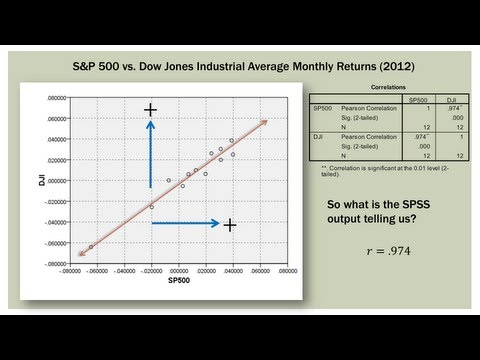

In [15]:

#Correlation
YouTubeVideo('4EXNedimDMs')

In [18]:
#Now lets check correlation and covariance on some stock prices!

#Pandas can get info off the web
import pandas_datareader as pdweb
#Set datetime for date input
import datetime

#Get the closing prices
#values wanted is the 'Adj Close'
prices = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Adj Close']
#Show preview
prices.head()

Symbols,BP,CVX,XOM
Date,,,
2009-12-31,35.612671,54.634960,51.152096
2010-01-04,36.337585,56.103920,51.872231
2010-01-05,36.595592,56.501320,52.074772
2010-01-06,36.786037,56.508419,52.524845
2010-01-07,36.773746,56.295525,52.359821


In [19]:
#Now lets get the volume trades

volume = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Volume']

#Show preview
volume.head()

Symbols,BP,CVX,XOM
Date,,,
2009-12-31,1517600.0,4246600.0,18852300.0
2010-01-04,3956100.0,10173800.0,27809100.0
2010-01-05,4109600.0,10593700.0,30174700.0
2010-01-06,6227900.0,11014600.0,35044700.0
2010-01-07,4431300.0,9626900.0,27192100.0


In [20]:
#Lets get the return
rets = prices.pct_change()

In [21]:
#Get the correlation of the stocks
corr = rets.corr

In [22]:
corr

<bound method DataFrame.corr of Symbols           BP       CVX       XOM
Date                                    
2009-12-31       NaN       NaN       NaN
2010-01-04  0.020356  0.026887  0.014078
2010-01-05  0.007100  0.007083  0.003905
2010-01-06  0.005204  0.000126  0.008643
2010-01-07 -0.000334 -0.003767 -0.003142
2010-01-08  0.002339  0.001765 -0.004011
2010-01-11  0.031501  0.017742  0.011220
2010-01-12 -0.006302 -0.005811 -0.004979
2010-01-13  0.004878 -0.007586 -0.004003
2010-01-14 -0.001133 -0.003133  0.000143
2010-01-15 -0.001458 -0.004023 -0.008180
2010-01-19  0.011032  0.005680  0.002315
2010-01-20 -0.020218 -0.019202 -0.017901
2010-01-21 -0.024402 -0.024441 -0.019550
2010-01-22 -0.028538 -0.021642 -0.008996
2010-01-25  0.011751 -0.000536 -0.003782
2010-01-26 -0.001025 -0.005365  0.001063
2010-01-27 -0.007352 -0.006069 -0.005764
2010-01-28 -0.012573 -0.006241 -0.008850
2010-01-29 -0.021106 -0.015292 -0.008159
2010-02-01  0.019779  0.020244  0.027161
2010-02-02 -0.030928  0.0

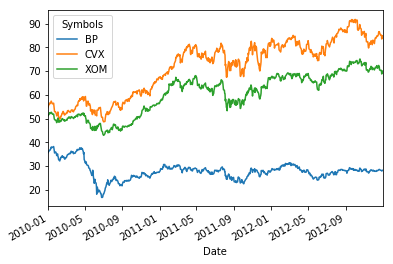

In [24]:
#Lets see the prices over time to get a very rough idea of the correlation between the stock prices
%matplotlib inline
prices.plot()

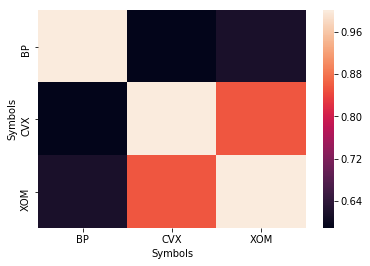

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#As expected pretty strong correlations with eachother
sns.heatmap(rets.corr())

#We'll learn much more about seaborn later!

In [26]:
sns.corrplot(rets,annot=False,diag_names=False)

AttributeError: module 'seaborn' has no attribute 'corrplot'

In [27]:
# We can also check for unique values and their counts 

#For example
ser1 = Series(['w','w','x', 'y', 'z' ,'w' ,'w' ,'x' ,'x' ,'y' ,'a' ,'z' ])

#Show
ser1

0     w
1     w
2     x
3     y
4     z
5     w
6     w
7     x
8     x
9     y
10    a
11    z
dtype: object

In [28]:
#Grab the unique values
ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [29]:
#Now get the count of the unique values
ser1.value_counts()

w    4
x    3
y    2
z    2
a    1
dtype: int64

# call different summary methods idmax,min,describe
#correlation vs covariance
# grab data from the web
#ploting seaborn
#unique values and values counts